In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error

# Load & Describe Data

In [2]:
df = pd.read_csv("hw-City_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
df_miami = df[df['RegionName'] == 'Miami']

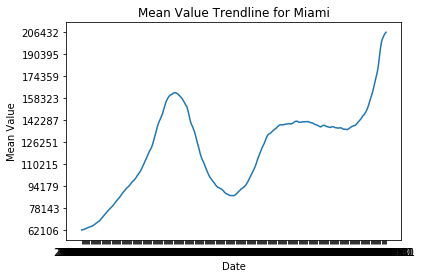

In [3]:
# Calculate mean for each column
mean_miami = df_miami.mean()

# Filter out the non-date columns
date_columns = df_miami.columns[pd.to_datetime(df_miami.columns, errors='coerce').notna()]
mean_miami = mean_miami[date_columns]

# Plot the trendline
plt.plot(mean_miami)
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.title('Mean Value Trendline for Miami')
plt.yticks(np.linspace(min(mean_miami), max(mean_miami), 10))
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

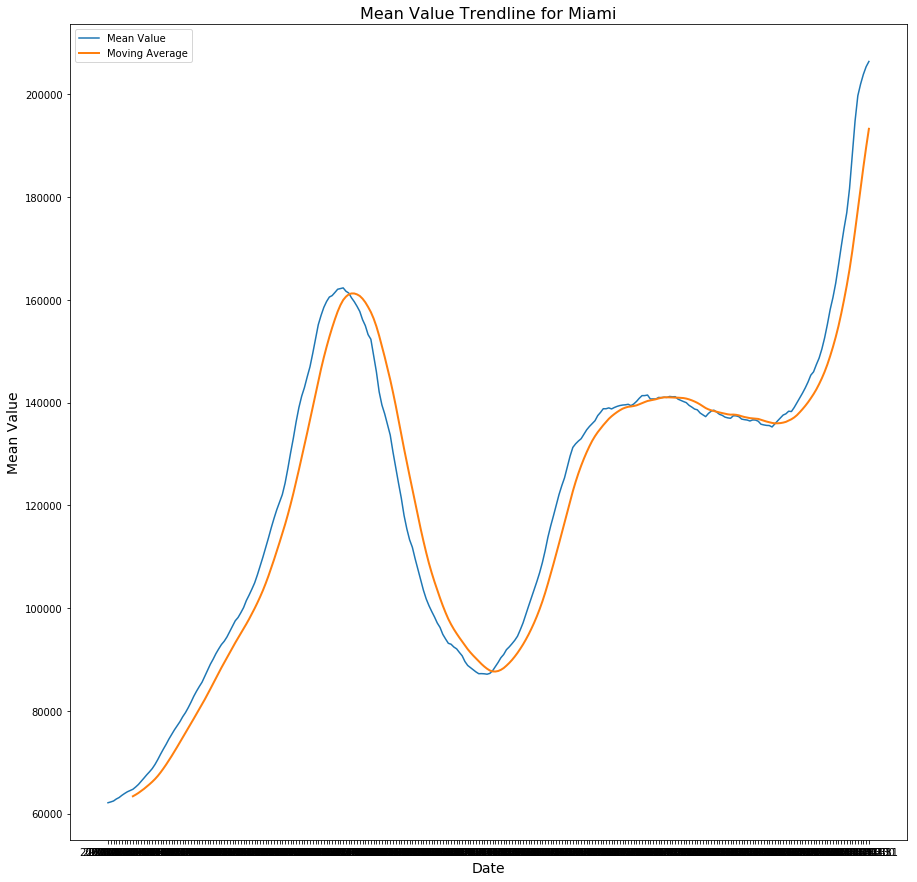

In [4]:
#Calculate the moving average with a window size of 10
moving_average = mean_miami.rolling(window=10).mean()

#Plot the trendline and moving average
plt.plot(mean_miami, label='Mean Value')
plt.plot(moving_average, label='Moving Average', linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.title('Mean Value Trendline for Miami', fontsize=16)
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

In [5]:
le = LabelEncoder()
df["RegionName"] = le.fit_transform(df["RegionName"])
df["StateName"] = le.fit_transform(df["StateName"])
df["State"] = le.fit_transform(df["State"])

In [6]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,6181,0,1984,city,34,34,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,202225.0,203846.0,...,626130.0,630055.0,634448.0,637780.0,640558.0,642163.0,643069.0,643457.0,644165.0,644175.0
1,12447,1,1627,city,4,4,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,139895.0,140105.0,...,603990.0,613371.0,621499.0,621801.0,622535.0,615058.0,608407.0,599659.0,596648.0,593890.0
2,39051,2,1288,city,43,43,"Houston-The Woodlands-Sugar Land, TX",Harris County,92321.0,92492.0,...,137592.0,139218.0,141535.0,142963.0,143921.0,144285.0,144367.0,144902.0,145363.0,145540.0
3,17426,3,508,city,14,14,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,128897.0,129433.0,...,237618.0,237894.0,238722.0,239522.0,240085.0,240137.0,240250.0,240381.0,240534.0,239246.0
4,6915,4,2543,city,43,43,"San Antonio-New Braunfels, TX",Bexar County,65597.0,65500.0,...,140228.0,142275.0,144473.0,146098.0,147571.0,147755.0,147582.0,147323.0,147836.0,147186.0


In [7]:
df.fillna(df.mean(), inplace=True)

In [8]:
df.describe()

,RegionID,SizeRank,RegionName,StateName,State,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
count,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,...,3.866000e+03,3.866000e+03,3.866000e+03,3.866000e+03,3.866000e+03,3.866000e+03,3.866000e+03,3.866000e+03,3.866000e+03,3.866000e+03
mean,47227.077341,4890.414899,1606.481635,22.916192,22.916192,104663.964965,104764.517717,105014.934314,105907.072549,106792.807805,...,2.543488e+05,2.580321e+05,2.611832e+05,2.632665e+05,2.648664e+05,2.648069e+05,2.649969e+05,2.648846e+05,2.648177e+05,2.652083e+05
std,83749.890978,5397.726923,931.209730,14.409883,14.409883,31270.634959,31546.948031,31791.457538,32280.733079,32846.190310,...,1.955242e+05,1.995358e+05,2.036615e+05,2.066122e+05,2.080989e+05,2.080697e+05,2.089926e+05,2.095166e+05,2.121848e+05,2.151778e+05
min,3310.000000,0.000000,0.000000,0.000000,0.000000,12634.000000,12690.000000,12663.000000,12703.000000,12807.000000,...,2.148200e+04,2.147500e+04,2.146400e+04,2.138800e+04,2.150400e+04,2.193100e+04,2.228500e+04,2.255600e+04,2.247700e+04,2.224700e+04
25%,16179.250000,1125.250000,810.250000,9.000000,9.000000,104663.964965,104764.517717,105014.934314,105907.072549,106792.807805,...,1.281648e+05,1.298890e+05,1.309252e+05,1.312475e+05,1.316668e+05,1.321348e+05,1.322185e+05,1.319578e+05,1.313435e+05,1.300055e+05
50%,30325.000000,3032.500000,1598.500000,22.000000,22.000000,104663.964965,104764.517717,105014.934314,105907.072549,106792.807805,...,2.245045e+05,2.259465e+05,2.266035e+05,2.253950e+05,2.259625e+05,2.243960e+05,2.214255e+05,2.182870e+05,2.145275e+05,2.090675e+05
75%,45057.250000,6424.000000,2411.750000,35.000000,35.000000,104663.964965,104764.517717,105014.934314,105907.072549,106792.807805,...,3.066740e+05,3.114050e+05,3.177578e+05,3.225468e+05,3.266208e+05,3.277930e+05,3.296605e+05,3.321595e+05,3.337102e+05,3.385065e+05
max,827212.000000,28439.000000,3226.000000,50.000000,50.000000,504990.000000,508180.000000,513074.000000,527031.000000,542481.000000,...,2.354836e+06,2.388700e+06,2.436427e+06,2.491050e+06,2.493984e+06,2.540480e+06,2.543246e+06,2.591873e+06,2.592573e+06,2.602135e+06


# Split Data

In [9]:
# Create X and y arrays
X = df[["RegionName","State","SizeRank"]]
y = df.drop(["RegionID","RegionType","RegionName","State","Metro","CountyName","SizeRank"],axis = 'columns')

In [10]:
#Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
label_encoder = preprocessing.LabelEncoder()
X['RegionName'] = label_encoder.fit_transform(X['RegionName'])
X['State'] = label_encoder.fit_transform(X['State'])

/Users/lucas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/lucas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
X

,RegionName,State,SizeRank
0,1984,34,0
1,1627,4,1
2,1288,43,2
3,508,14,3
4,2543,43,4
...,...,...,...
3861,1615,4,28364
3862,2160,37,28439
3863,1449,4,28439
3864,2307,47,28439


In [13]:
# Instantiate the model
reg = LinearRegression()

In [14]:
y

,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,34,202225.000000,203846.000000,205338.000000,208403.000000,211332.000000,214415.000000,217169.000000,219665.000000,222199.000000,...,626130.00000,630055.000000,634448.000000,637780.000000,640558.000000,642163.000000,643069.000000,643457.000000,644165.000000,644175.0
1,4,139895.000000,140105.000000,140911.000000,142490.000000,144368.000000,146149.000000,147940.000000,149917.000000,151792.000000,...,603990.00000,613371.000000,621499.000000,621801.000000,622535.000000,615058.000000,608407.000000,599659.000000,596648.000000,593890.0
2,43,92321.000000,92492.000000,93073.000000,92229.000000,91312.000000,89955.000000,91071.000000,90937.000000,91010.000000,...,137592.00000,139218.000000,141535.000000,142963.000000,143921.000000,144285.000000,144367.000000,144902.000000,145363.000000,145540.0
3,14,128897.000000,129433.000000,130357.000000,132084.000000,134102.000000,136047.000000,138046.000000,140115.000000,142232.000000,...,237618.00000,237894.000000,238722.000000,239522.000000,240085.000000,240137.000000,240250.000000,240381.000000,240534.000000,239246.0
4,43,65597.000000,65500.000000,65631.000000,65633.000000,65196.000000,64563.000000,64062.000000,64111.000000,64138.000000,...,140228.00000,142275.000000,144473.000000,146098.000000,147571.000000,147755.000000,147582.000000,147323.000000,147836.000000,147186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,4,104663.964965,104764.517717,105014.934314,105907.072549,106792.807805,107807.468293,108769.392405,109958.149951,111141.379981,...,262746.00000,264802.000000,262975.000000,262037.000000,257828.000000,253807.000000,249674.000000,247856.000000,247957.000000,246631.0
3862,37,104663.964965,104764.517717,105014.934314,105907.072549,106792.807805,107807.468293,108769.392405,109958.149951,111141.379981,...,254348.78144,258032.089943,261183.214815,263266.474308,264866.367301,264806.925443,264996.947888,264884.649959,264817.660895,586650.0
3863,4,104663.964965,104764.517717,105014.934314,105907.072549,106792.807805,107807.468293,108769.392405,109958.149951,111141.379981,...,254348.78144,258032.089943,261183.214815,263266.474308,264866.367301,264806.925443,264996.947888,372996.000000,264817.660895,350032.0
3864,47,104663.964965,104764.517717,105014.934314,105907.072549,106792.807805,107807.468293,108769.392405,109958.149951,111141.379981,...,271136.00000,279018.000000,285569.000000,287426.000000,285305.000000,287656.000000,289733.000000,290697.000000,285873.000000,277828.0


In [15]:
# Fit the model to the data
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [[4.00000000e+00 1.08200933e+05 1.08248554e+05 1.08482093e+05
  1.09457822e+05 1.10487649e+05 1.11662083e+05 1.12783301e+05
  1.14128495e+05 1.15499659e+05 1.16854296e+05 1.18135064e+05
  1.19441963e+05 1.20657958e+05 1.21856077e+05 1.23212166e+05
  1.24613642e+05 1.25965480e+05 1.27214758e+05 1.28351169e+05
  1.29503335e+05 1.30564921e+05 1.31451246e+05 1.32311275e+05
  1.33146632e+05 1.33652543e+05 1.34061640e+05 1.35801322e+05
  1.36518429e+05 1.37462141e+05 1.38656597e+05 1.39995100e+05
  1.41280099e+05 1.42737577e+05 1.44001035e+05 1.45323347e+05
  1.46872548e+05 1.47947986e+05 1.49218869e+05 1.50591900e+05
  1.52552362e+05 1.54040881e+05 1.55768185e+05 1.57153263e+05
  1.58857952e+05 1.60789093e+05 1.62313584e+05 1.64101713e+05
  1.65551042e+05 1.66700510e+05 1.68592563e+05 1.70827722e+05
  1.72919110e+05 1.75483830e+05 1.78027783e+05 1.80360192e+05
  1.82654390e+05 1.85373729e+05 1.87967070e+05 1.90286921e+05
  1.92598587e+05 1.94995937e+05 1.96566737e+05 1.99268256

In [17]:
# Compute R-squared
r_squared = reg.score(X_test, y_test)
print("R^2: {}".format(r_squared))


R^2: 0.03355661881382757
